<a href="https://colab.research.google.com/github/harshitsunda19/DeepLearningProjects/blob/main/ships_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [ ]:
!nvidia-smi

Tue Feb 25 11:22:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshit1900","key":"9787fc07f6672f7265d7e3da8a70c2db"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 910, in dataset_list_cli
    tag_ids, search, user, mine, page)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 880, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 66, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 97, in get_size
    return '%.*f%s' % (precision, size, suffixes[suffix_index])
TypeError: float argument required, not NoneType


In [ ]:
!kaggle datasets download -d arpitjain007/game-of-deep-learning-ship-datasets -p /content --force

 82% 66.0M/80.9M [00:00<00:00, 129MB/s]
100% 80.9M/80.9M [00:00<00:00, 165MB/s]


In [ ]:
!pwd

/content


In [ ]:
ls

game-of-deep-learning-ship-datasets.zip  kaggle.json  sample_data/


In [ ]:
mkdir ships

In [ ]:
ls

game-of-deep-learning-ship-datasets.zip  kaggle.json  sample_data/  ships/


In [ ]:
!unzip game-of-deep-learning-ship-datasets.zip -d ships

Streaming output truncated to the last 5000 lines.
  inflating: ships/train/images/2829344.jpg  
  inflating: ships/train/images/2829347.jpg  
  inflating: ships/train/images/2829351.jpg  
  inflating: ships/train/images/2829357.jpg  
  inflating: ships/train/images/2829359.jpg  
  inflating: ships/train/images/2829362.jpg  
  inflating: ships/train/images/2829366.jpg  
  inflating: ships/train/images/2829369.jpg  
  inflating: ships/train/images/2829372.jpg  
  inflating: ships/train/images/2829373.jpg  
  inflating: ships/train/images/2829377.jpg  
  inflating: ships/train/images/2829378.jpg  
  inflating: ships/train/images/2829381.jpg  
  inflating: ships/train/images/2829382.jpg  
  inflating: ships/train/images/2829383.jpg  
  inflating: ships/train/images/2829385.jpg  
  inflating: ships/train/images/2829386.jpg  
  inflating: ships/train/images/2829387.jpg  
  inflating: ships/train/images/2829389.jpg  
  inflating: ships/train/images/2829390.jpg  
  inflating: ships/train/imag

In [ ]:
cd ships

/content/ships


In [ ]:
ls

sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train/


In [ ]:
mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
!unzip train.zip -d train

unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


In [ ]:
ls

sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train/


In [ ]:
df_train = pd.read_csv('/content/ships/train/train.csv')

In [ ]:
df_train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [ ]:
labels = {1 : 'Cargo',
         2 : 'Military',
         3 : 'Carrier',
         4 : 'Cruise',
         5 : 'Tankers'}
df_train['category_label'] = df_train['category'].map(labels)

In [ ]:
df_train.head()

,image,category,category_label
0,2823080.jpg,1,Cargo
1,2870024.jpg,1,Cargo
2,2662125.jpg,2,Military
3,2900420.jpg,3,Carrier
4,2804883.jpg,2,Military


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype='int8', sparse=False)
y_train = ohe.fit_transform(df_train['category'].values.reshape(-1,1))

In [ ]:
import keras
from tqdm import tqdm
from keras.preprocessing import image
train_img = []
for i in tqdm(range(df_train.shape[0])):
    img = image.load_img('/content/ships/train/images/'+df_train['image'][i], target_size = (256, 256, 3))
    img = image.img_to_array(img)
    img = img/255
    train_img.append(img)
X = np.array(train_img)

Using TensorFlow backend.


100%|██████████| 6252/6252 [00:10<00:00, 616.47it/s]


In [ ]:
X.shape

(6252, 256, 256, 3)

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

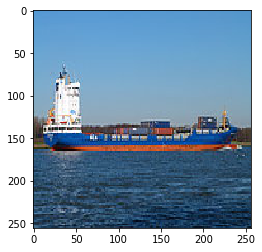

In [ ]:
plt.imshow(X[0])

In [ ]:
df_train['category_label'][0]

'Cargo'

In [ ]:
df_test = pd.read_csv('/content/ships/test_ApKoW4T.csv')
df_test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [ ]:
from tqdm import tqdm 
from keras.preprocessing import image
test_img = [] 
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('/content/ships/train/images/'+df_test['image'][i], target_size = (256, 256, 3)) 
    img = image.img_to_array(img) 
    img = img/255
    test_img.append(img) 
y = np.array(test_img)

100%|██████████| 2680/2680 [00:04<00:00, 617.18it/s]


In [ ]:
y.shape

(2680, 256, 256, 3)

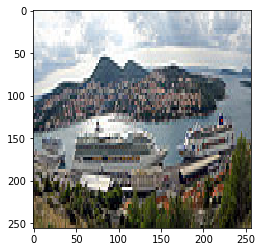

In [ ]:
plt.imshow(y[0])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3, 3), input_shape = (256, 256, 3), activation  = 'relu', name = 'first'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.30))

#model.add(Conv2D(128, (3, 3), activation = 'relu'))
#model.add(AveragePooling2D(pool_size = (2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.30))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.30))

#model.add(Conv2D(32, (3, 3), activation = 'relu'))
#model.add(AveragePooling2D(pool_size = (2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.30))

model.add(Flatten())

#model.add(Dense(512, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))

#model.add(Dense(256, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))

#model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#model.add(Dense(32, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax', name = 'last'))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Conv2D)               (None, 254, 254, 64)      1792      
_________________________________________________________________
average_pooling2d_1 (Average (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 127, 64)      256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      18464     
_________________________________________________________________
average_pooling2d_2 (Average (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 32)       

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, df_validate = train_test_split(df_train, test_size = 0.30, random_state = 42)
train_df = train_df.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_validate = df_validate.reset_index(drop = True)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lrr = ReduceLROnPlateau(monitor = 'val_loss',
                        factor = 0.2,
                        patience = 5,
                        min_lr = 0.001
                       )

In [ ]:
train_df['category'].value_counts()

1    1494
5     843
2     812
3     635
4     592
Name: category, dtype: int64

In [ ]:
df_validate['category'].value_counts()

1    626
5    374
2    355
3    281
4    240
Name: category, dtype: int64

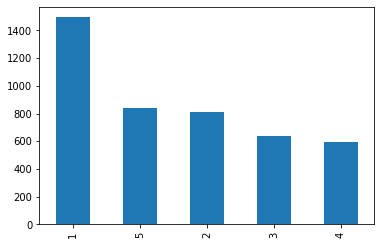

In [ ]:
train_df['category'].value_counts().plot.bar()
plt.show()

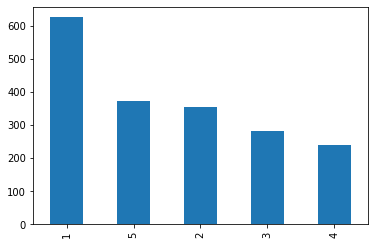

In [ ]:
df_validate['category'].value_counts().plot.bar()
plt.show()

In [ ]:
train_total = train_df.shape[0]
validate_total = df_validate.shape[0]
batch_size = 128

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_generator = ImageDataGenerator(
        rotation_range = 15,
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
    )

In [ ]:
train_gen = train_data_generator.flow_from_dataframe(
        dataframe = train_df,
        directory = '/content/ships/train/images/',
        x_col = 'image',
        y_col = 'category_label',
        target_size = (256, 256),
        batch_size = batch_size,
        class_mode = 'categorical',
    )

Found 4376 validated image filenames belonging to 5 classes.


In [ ]:
validate_data_generator = ImageDataGenerator(
        rotation_range = 15,
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
    )

In [ ]:
validate_gen = validate_data_generator.flow_from_dataframe(
        dataframe = df_validate,
        directory = '/content/ships/train/images/',
        x_col = 'image',
        y_col = "category_label",
        target_size = (256,256),
        batch_size = batch_size,
        class_mode = 'categorical',
    )

Found 1876 validated image filenames belonging to 5 classes.


In [ ]:
history = model.fit_generator(
        train_gen,
        epochs = 50,
        steps_per_epoch = 34,
        validation_data = validate_gen,
        validation_steps = 15,
        callbacks = [lrr]
  )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
34/34 [==============================] - 71s 2s/step - loss: 1.9443 - acc: 0.2425 - val_loss: 1.7989 - val_acc: 0.2569
Epoch 2/50
34/34 [==============================] - 68s 2s/step - loss: 1.7161 - acc: 0.3007 - val_loss: 1.5877 - val_acc: 0.3081
Epoch 3/50
34/34 [==============================] - 69s 2s/step - loss: 1.5850 - acc: 0.3473 - val_loss: 1.3861 - val_acc: 0.4254
Epoch 4/50
34/34 [==============================] - 65s 2s/step - loss: 1.4658 - acc: 0.3895 - val_loss: 1.4468 - val_acc: 0.4179
Epoch 5/50
34/34 [==============================] - 67s 2s/step - loss: 1.3967 - acc: 0.4263 - val_loss: 1.2758 - val_acc: 0.4813
Epoch 6/50
34/34 [==============================] - 65s 2s/step - loss: 1.3508 - acc: 0.4433 - val_loss: 1.2843 - val_acc: 0.4611
Epoch 7/50
34/34 [==============================] - 68s 2s/step - loss: 1.2697 - acc: 0.4729 - val_loss: 1.7743 - val_acc: 0

In [ ]:
!nvidia-smi

Tue Feb 25 12:17:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    37W / 250W |  15765MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


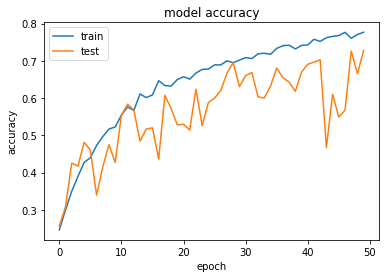

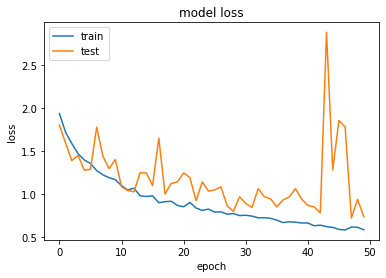

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()